# Boston Housing

- O objetivo é prever o valor de venda de uma casa a partir de N variáveis que são dadas no banco de dados.


- Variáveis
 - CRIM - taxa de crime per capita por cidade
 - ZN - proporção de áreas residenciais acima de 25000 metros quadrados
 - INDUS - proporção de acres de negócios não varejistas por cidade
 - CHAS - variável dummy Charles River (1 se próximo ao rio, 0 caso contrário)
 - NOX - concentração de oxído nítrico (por 10 milhões)
 - RM - número médio de quartos por habitação
 - AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
 - DIS - distâncias ponderadas para cinco centros de empregos de Boston
 - RAD - índice de acessibilidade a rodovias
 - TAX - valor total da taxa de imposto sobre a propriedade (per 10,000)
 - PTRATIO - proporção aluno-professor por cidade
 - B - 1000(Bk - 0.63)^2 onde Bk é a proporcão de negros por cidade
 - LSTAT - % população de baixa renda
 - MEDV - Valor médio de casas ocupadas pelo proprietário (em 1000)

In [245]:
# Importando bibliotecas

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Incluindo nome das colunas e importando banco de dados
nome_colunas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=nome_colunas)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [246]:
# Dimensão do dataset
print(np.shape(data))

# Estatísticas
print(data.describe())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

In [247]:
# Número de variáveis únicas do dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [248]:
# Checando valores vazios nas colunas
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [249]:
# Verificando valores vazios nas linhas
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


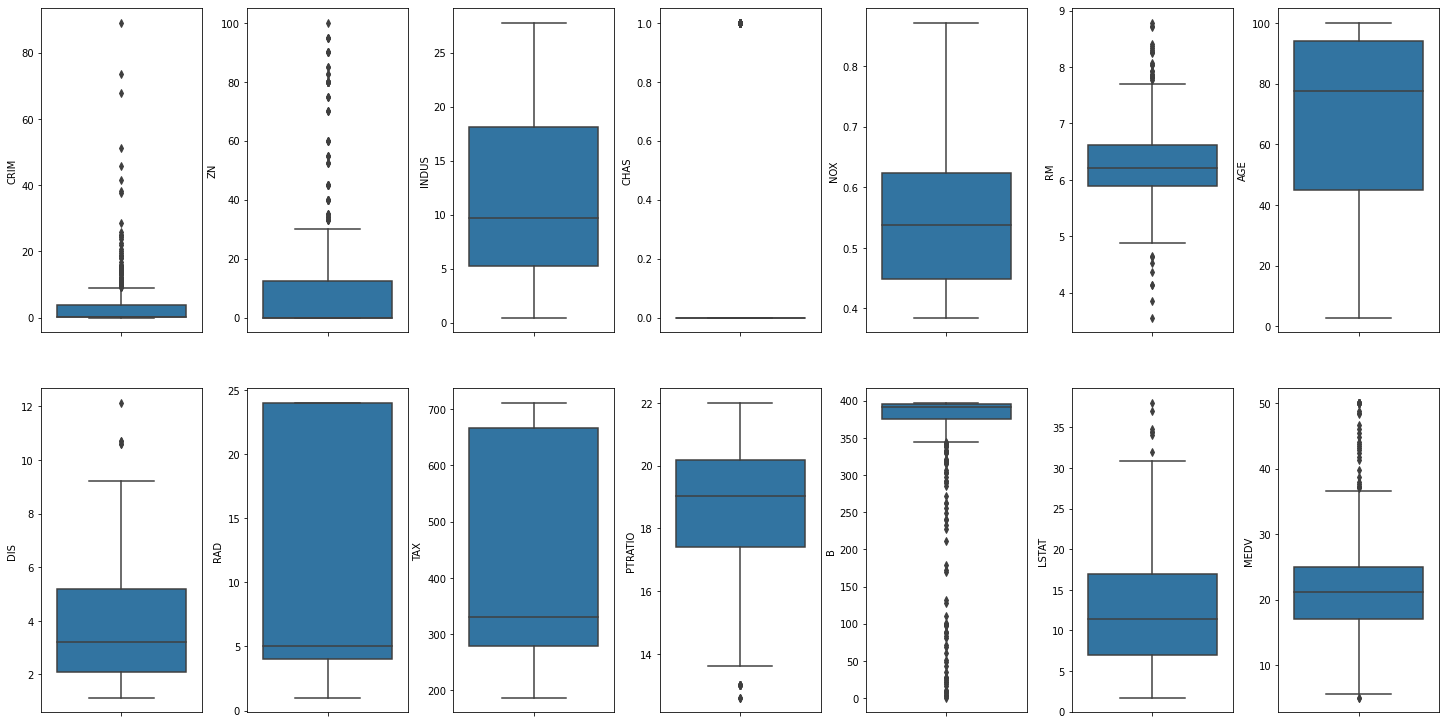

In [250]:
# Vendo tendências dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [251]:
# Diversas colunas tem outliners, iremos olhar o percentual deles.

for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Coluna %s outliers = %.2f%%" % (k, perc))

Coluna CRIM outliers = 13.04%
Coluna ZN outliers = 13.44%
Coluna INDUS outliers = 0.00%
Coluna CHAS outliers = 100.00%
Coluna NOX outliers = 0.00%
Coluna RM outliers = 5.93%
Coluna AGE outliers = 0.00%
Coluna DIS outliers = 0.99%
Coluna RAD outliers = 0.00%
Coluna TAX outliers = 0.00%
Coluna PTRATIO outliers = 2.96%
Coluna B outliers = 15.22%
Coluna LSTAT outliers = 1.38%
Coluna MEDV outliers = 7.91%


In [252]:
# Variável MEDV tem os valores acima de 50 cortado, então qualquer valor acima de 50 não ajudará na previsão do modelo.
# Tirando os valores de MEDV acima de 50

data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


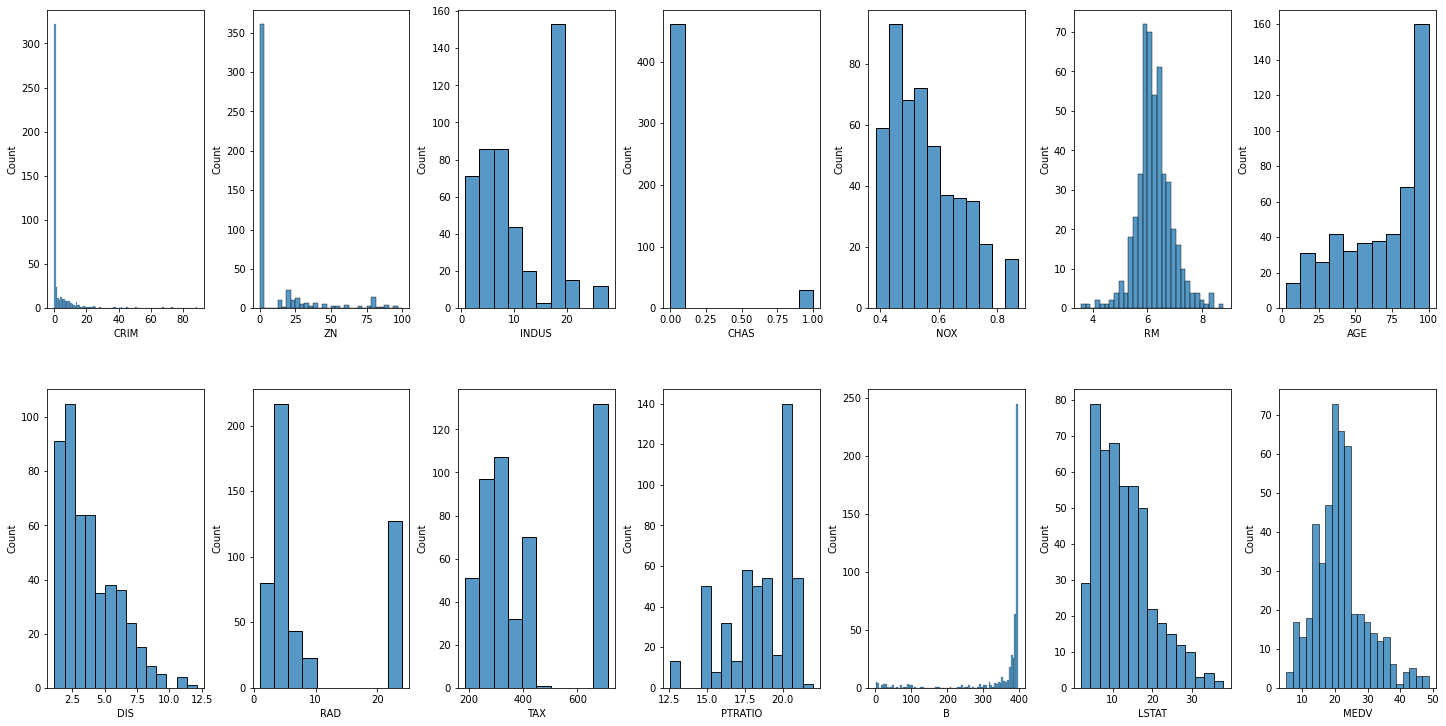

In [253]:
# Histograma 

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

CRIM, ZN e B parecem ter uma distribuição distorcida. MEDV parece ter uma distribuição normal.

As outras colunas tem distribuição normal ou bimodal, exceto CHAS que é uma variável discreta.

<AxesSubplot:>

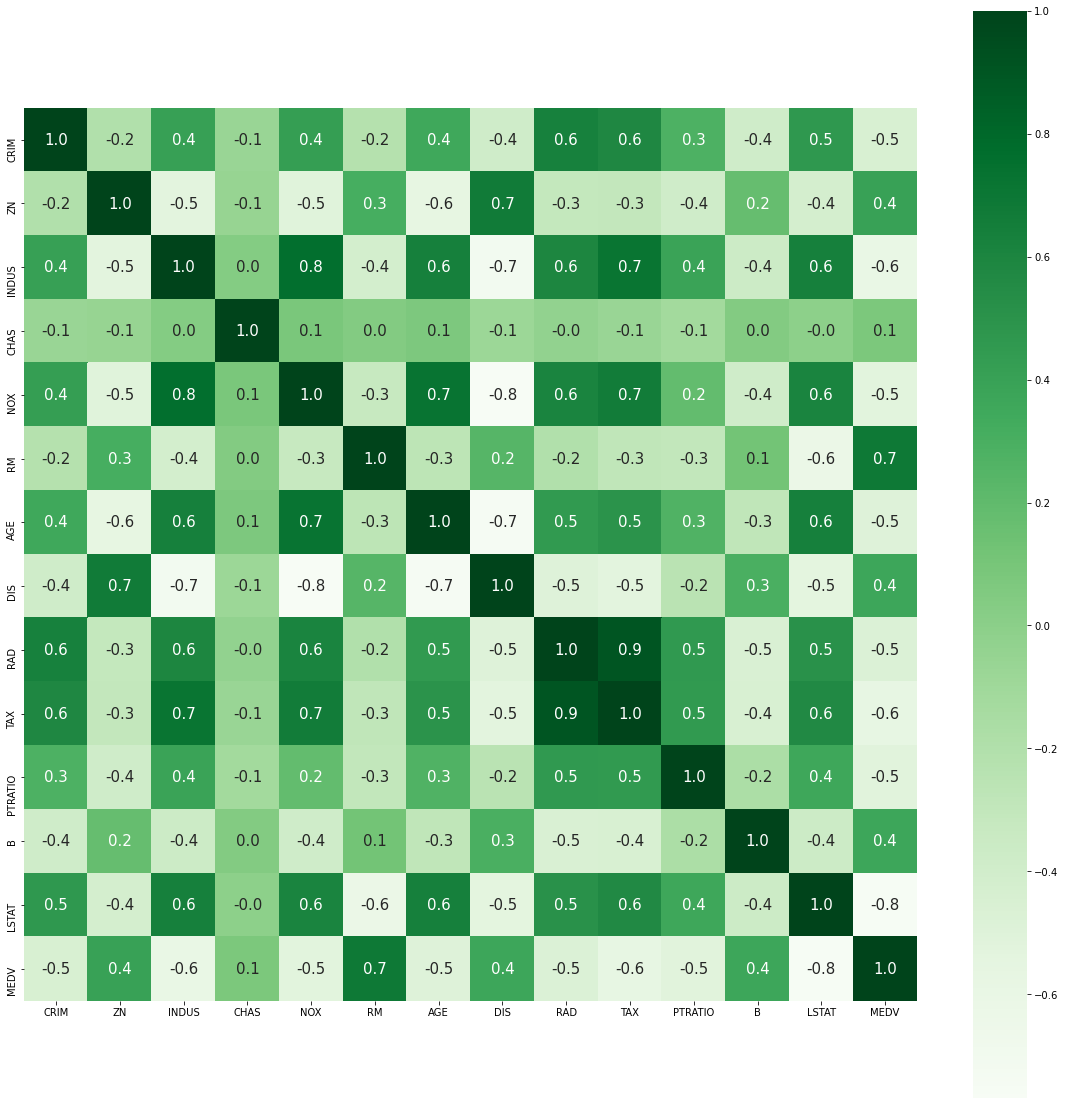

In [254]:
# Mapa de calor
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


Podemos ver que TAX e RAD são altamente correlacioandos.
LSTAT, INDUS, RM, TAX, NOX, PTRAIO  tem correlaçÃO acima 0.5 com MEDV, ou seja, podem ser entendidos como bons indicadores para previsão. 

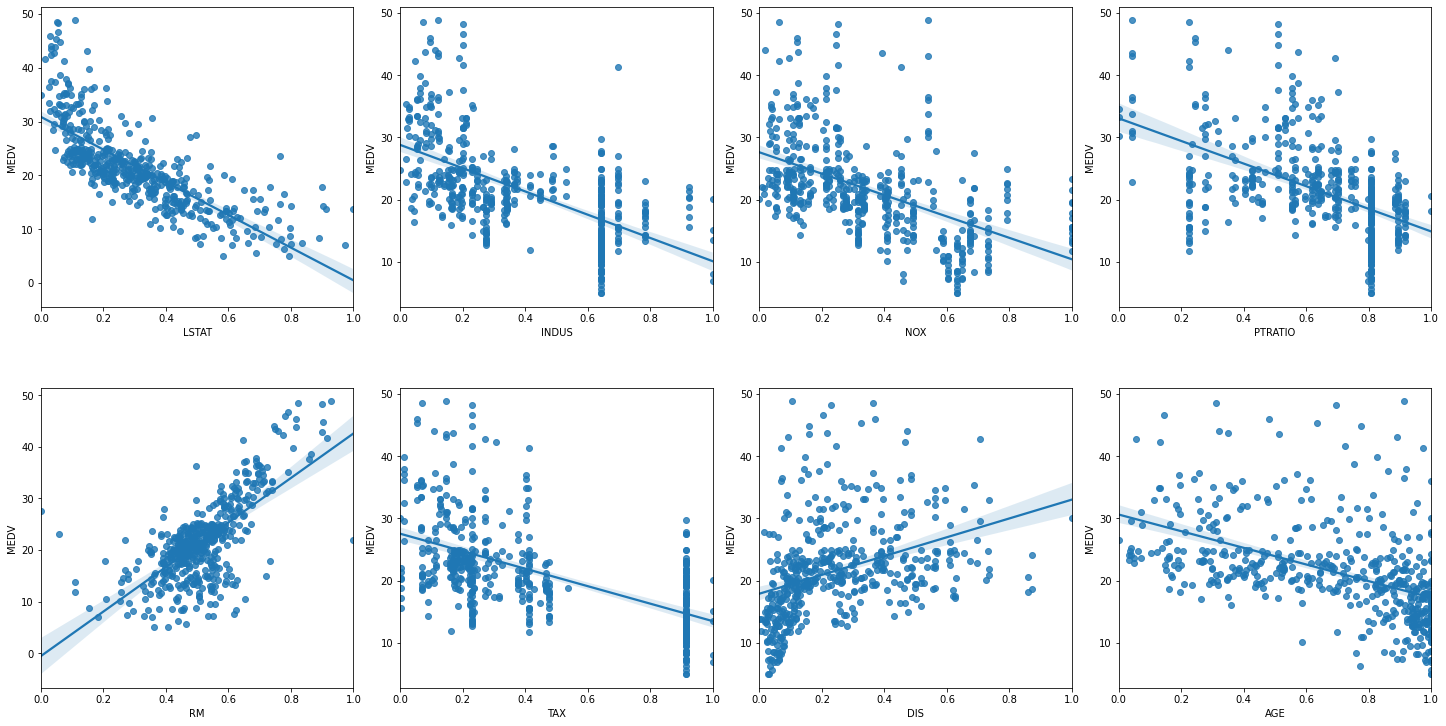

In [255]:
# Comparando as variáveis acima com MEDV

from sklearn import preprocessing

# Fazendo a escala das variáveis 
escala_min_max = preprocessing.MinMaxScaler()

colunas = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,colunas]
y = data['MEDV']
x = pd.DataFrame(data=escala_min_max.fit_transform(x), columns=colunas)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(colunas):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


# Construindo o modelo

In [256]:
# Removendo as oscilações de y com log

y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [257]:
# Regressão Linear

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

LR = linear_model.LinearRegression()
kf = KFold(n_splits=10)
escala_min_max = preprocessing.MinMaxScaler()
x_escalado = escala_min_max.fit_transform(x)
scores = cross_val_score(LR, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

mapa_scores = {}
mapa_scores['LinearRegression'] = scores
ridge = linear_model.Ridge()
scores = cross_val_score(ridge, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
mapa_scores['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)


Regressão linear com ou sem regulação Ridge tem o mesmo score.

In [258]:
# SRV com kernal rbt

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(x_escalado, y)
print("Melhor classificador:", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Melhor classificador: SVR(gamma=1.0)
MSE: -0.04 (+/- 0.03)


In [259]:
# Ajustando para o melhor classificador

svr = SVR(gamma=1.0)
scores = cross_val_score(svr, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
mapa_scores['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


In [260]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

DR = DecisionTreeRegressor(max_depth=5)
grid_sv = GridSearchCV(DR, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_escalado, y)
print("Melhor classificador:", grid_sv.best_estimator_)
scores = cross_val_score(DR, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Melhor classificador: DecisionTreeRegressor(max_depth=4)
MSE: -0.05 (+/- 0.04)


In [261]:
# Ajustando para o melhor classificador

DR = DecisionTreeRegressor(max_depth=4)
scores = cross_val_score(DR, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
mapa_scores['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


In [262]:
#KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_escalado, y)
print("Melhor classificador:", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Melhor classificador: KNeighborsRegressor(n_neighbors=6)
KNN Accuracy: -0.04 (+/- 0.02)


In [263]:
# Ajustando para o melhor classificador

knn = KNeighborsRegressor(n_neighbors=6)
scores = cross_val_score(knn, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
mapa_scores['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.04 (+/- 0.02)


In [264]:
# GBoosting

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(x_escalado, y)
print("Melhor classificador:", grid_sv.best_estimator_)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Melhor classificador: GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9,
                          random_state=30)
MSE: -0.04 (+/- 0.02)


In [265]:
## Ajustando para o melhor classificador

gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9, random_state=30)
scores = cross_val_score(gbr, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
mapa_scores['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


<AxesSubplot:>

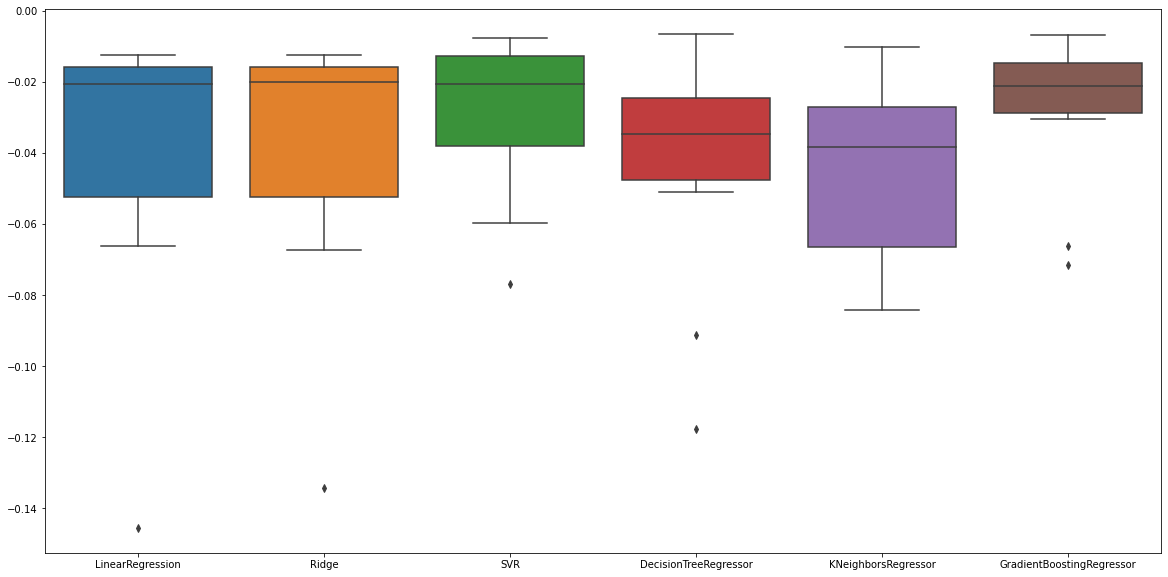

In [266]:
plt.figure(figsize=(20, 10))
mapa_scores = pd.DataFrame(mapa_scores)
sns.boxplot(data=mapa_scores)

In [267]:
modelos = []
modelos.append(('LR', linear_model.LinearRegression()))
modelos.append(('Ridge', linear_model.Ridge()))
modelos.append(('SRV', SVR(gamma=1.0)))
modelos.append(('DR', DecisionTreeRegressor(max_depth=5)))
modelos.append(('KNN', KNeighborsRegressor(n_neighbors=6)))
modelos.append(('GBoosting', GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9, random_state=30)))


resultados = []
nomes = []
for nome, modelo in modelos:
    kf = KFold(n_splits=10)
    scores = cross_val_score(modelo, x_escalado, y, cv=kf, scoring='neg_mean_squared_error')
    resultados.append(scores)
    nomes.append(nome)
    print(nome, ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



LR : -0.04 (+/- 0.04)
Ridge : -0.04 (+/- 0.04)
SRV : -0.03 (+/- 0.02)
DR : -0.05 (+/- 0.04)
KNN : -0.04 (+/- 0.02)
GBoosting : -0.03 (+/- 0.02)


SVR e Gradient Boosting tem os melhores resultados. com média e desvio padrão mais próximos de 0.